Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')


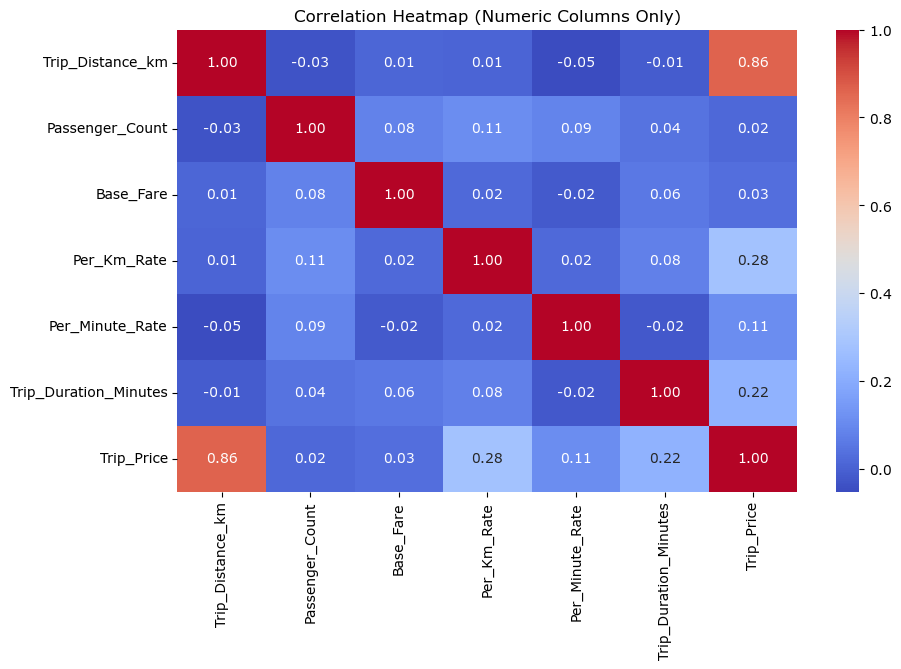

===== RANDOM FOREST RESULTS (USD) =====
MAE: 5.036263990643864
MSE: 106.43304960929312
R2 : 0.9576097464530432

===== ADABOOST RESULTS (USD) =====
MAE: 9.884858753338815
MSE: 166.36627191234322
R2 : 0.9337394871807712


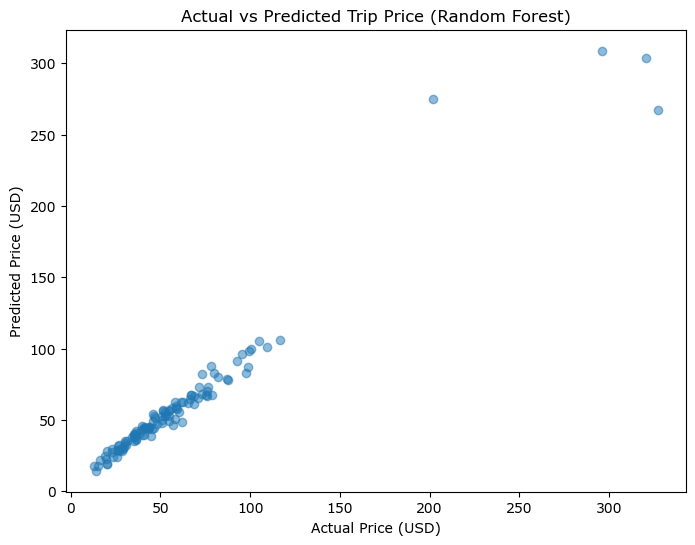

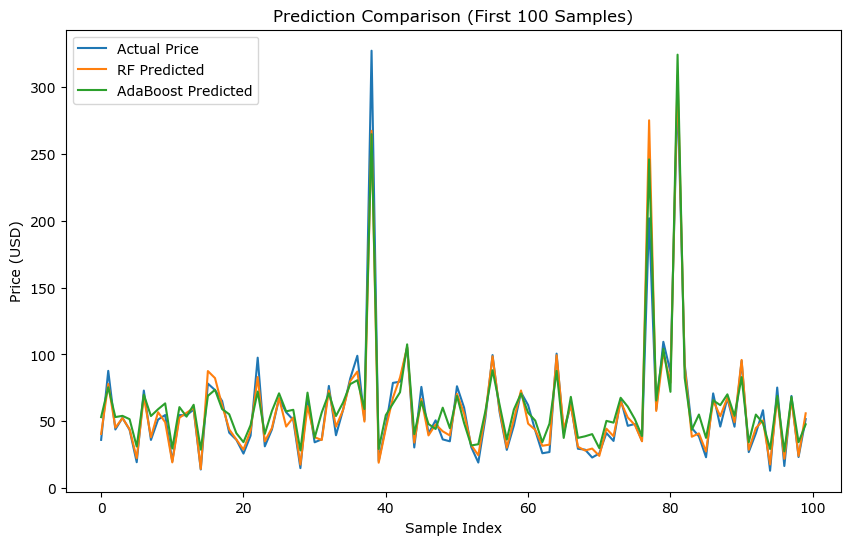

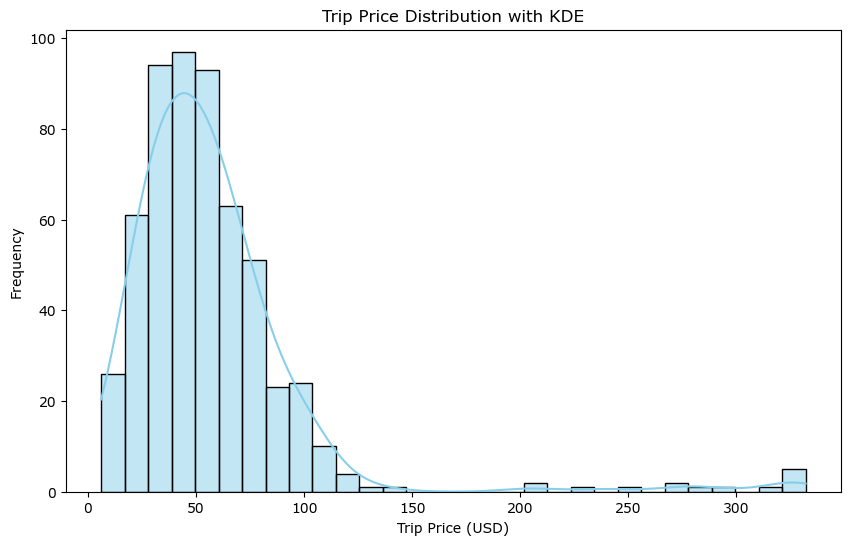

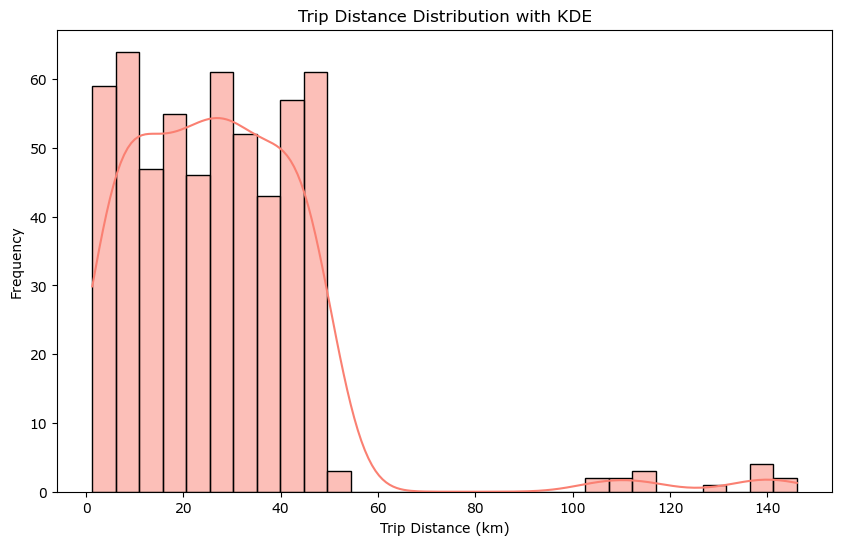

Models and scaler have been saved successfully!


In [1]:
# ======================================
#   MODEL TRAINING + VISUALIZATION (USD)
# ======================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =====================
# Load Dataset
# =====================

df = pd.read_csv("taxi_trip_pricing.csv")
df = df.dropna()
print(df.columns)
# Remove invalid values
df = df[df["Trip_Distance_km"] > 0]
df = df[df["Trip_Price"] > 0]
df = df[df["Trip_Duration_Minutes"] > 0]
# =====================
# Visualization: Heatmap (Numeric Only)
# =====================

numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# =====================
# Select Features & Target
# =====================

target = "Trip_Price"

# Remove all categorical columns to avoid errors
categorical_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]

X = df.drop(columns=[target] + categorical_cols)
y = df[target]

# =====================
# Train-test split
# =====================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================
# Scaling (Now Works Because All Columns Are Numeric)
# =====================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================
# Train Models
# =====================

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

ada = AdaBoostRegressor(n_estimators=200, learning_rate=0.8, random_state=42)
ada.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf.predict(X_test_scaled)
ada_pred = ada.predict(X_test_scaled)

# =====================
# Evaluation
# =====================

print("===== RANDOM FOREST RESULTS (USD) =====")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2 :", r2_score(y_test, rf_pred))

print("\n===== ADABOOST RESULTS (USD) =====")
print("MAE:", mean_absolute_error(y_test, ada_pred))
print("MSE:", mean_squared_error(y_test, ada_pred))
print("R2 :", r2_score(y_test, ada_pred))

# =====================
# Visualizations
# =====================

plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Trip Price (Random Forest)")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label="Actual Price")
plt.plot(rf_pred[:100], label="RF Predicted")
plt.plot(ada_pred[:100], label="AdaBoost Predicted")
plt.legend()
plt.title("Prediction Comparison (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price (USD)")
plt.show()

# ===============================
# 1. Trip Price Distribution
# ===============================
plt.figure(figsize=(10,6))
sns.histplot(df["Trip_Price"], kde=True, bins=30, color="skyblue")
plt.title("Trip Price Distribution with KDE")
plt.xlabel("Trip Price (USD)")
plt.ylabel("Frequency")
plt.show()

# ===============================
# 2. Trip Distance Distribution
# ===============================
plt.figure(figsize=(10,6))
sns.histplot(df["Trip_Distance_km"], kde=True, bins=30, color="salmon")
plt.title("Trip Distance Distribution with KDE")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Frequency")
plt.show()

import joblib
# =====================
# Save Models & Scaler
# =====================
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(ada, "adaboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Models and scaler have been saved successfully!")